<a href="https://colab.research.google.com/github/rojaa004/Lead-Scoring-Case-Study/blob/main/NDVI_SMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install rasterio

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import rasterio.features
from rasterio.features import geometry_window
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.merge import merge
from rasterio.plot import show

In [9]:
#import Sentinel image band8 (NIR band)
#def reshape_as_image(arr: np.ndarray):
with rio.open('/images/T43PGQ_20240318T050651_B08_10m.jp2') as src8:
    nir_band = src8.read(1).astype(float)
    #nir_band = reshape_as_image(src8.read());

In [10]:
#Import Sentinel image band4 (red band)
#def reshape_as_image(arr: np.ndarray):
with rio.open('/images/T43PGQ_20240318T050651_B04_10m.jp2') as src4:
 red_band = src4.read(1).astype(float)
 #red_band = reshape_as_image(src4.read());

In [11]:
#Calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

<ipython-input-11-80a641037d0b>:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_band - red_band) / (nir_band + red_band)


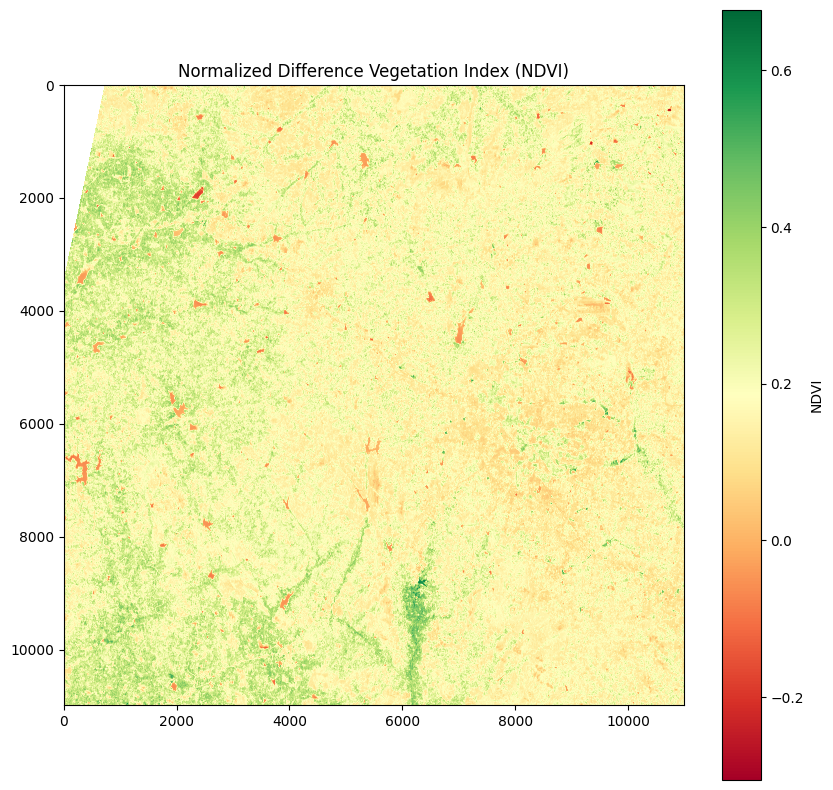

In [12]:
#Show NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')
#plt.xlabel('Column #')
#plt.ylabel('Row #')
plt.show()

In [13]:
# Calculate the percentage of vegetation and water pixels
vegetation_pixels = np.count_nonzero(ndvi > 0.2)
water_pixels = np.count_nonzero((ndvi <= 0.2) & (ndvi >= 0))
total_pixels = vegetation_pixels + water_pixels

vegetation_percentage = (vegetation_pixels / total_pixels) * 100
water_percentage = (water_pixels / total_pixels) * 100

# Print the results
print("Vegetation percentage:", vegetation_percentage)
print("Water percentage:", water_percentage)


Vegetation percentage: 37.62553497616489
Water percentage: 62.3744650238351


In [15]:
#import sentinel image Band8 (NIR band)
with rio.open('/images/T43PGQ_20200329T050651_B08_10m.jp2') as src81:
  nir_band1 = src81.read(1).astype(float)

In [16]:
#import Sentinel image Band4 (red band)
with rio.open('/images/T43PGQ_20200329T050651_B04_10m.jp2') as src41:
  red_band1 = src41.read(1).astype(float)

In [17]:
#Calculate NDVI
ndvi1 = (nir_band1 - red_band1) / (nir_band1+red_band1)

<ipython-input-17-11514cda3133>:1: RuntimeWarning: invalid value encountered in divide
  ndvi1 = (nir_band1 - red_band1) / (nir_band1+red_band1)


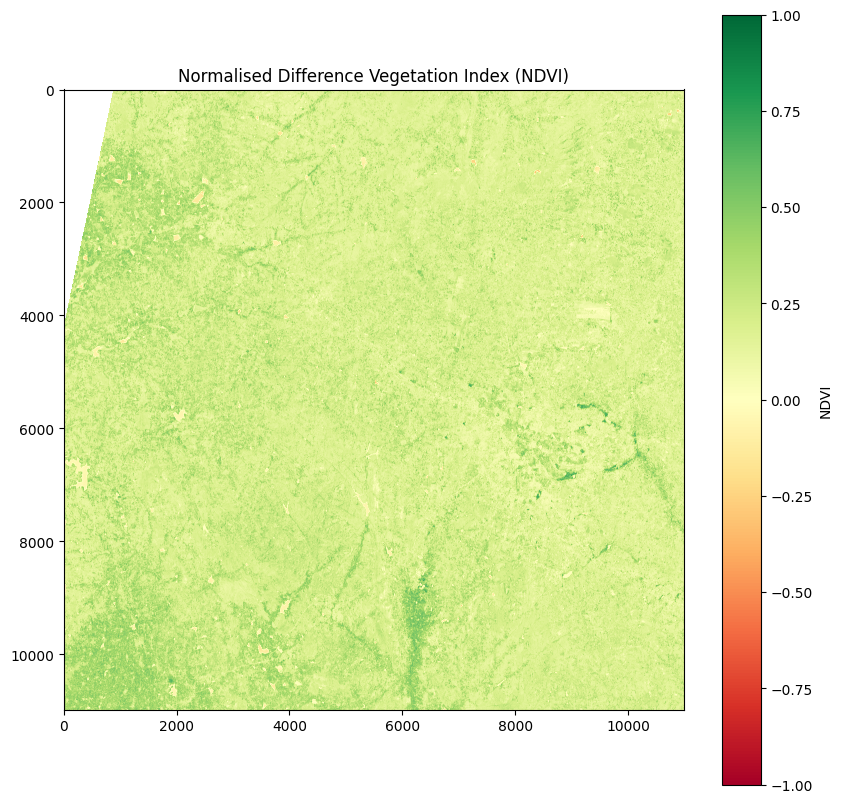

In [20]:
#Show NDVI
plt.figure(figsize=(10,10))
plt.imshow(ndvi1, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalised Difference Vegetation Index (NDVI)')
plt.show()

In [21]:
# Calculate the percentage of vegetation and water pixels
vegetation_pixels = np.count_nonzero(ndvi1 > 0.2)
water_pixels = np.count_nonzero((ndvi1 <= 0.2) & (ndvi1 >= 0))
total_pixels = vegetation_pixels + water_pixels

vegetation_percentage = (vegetation_pixels / total_pixels) * 100
water_percentage = (water_pixels / total_pixels) * 100

# Print the results
print("Vegetation percentage:", vegetation_percentage)
print("Water percentage:", water_percentage)


Vegetation percentage: 43.55743687525699
Water percentage: 56.442563124743


<ipython-input-22-098a78ac60e5>:6: RuntimeWarning: invalid value encountered in divide
  smi = (nir8A_band - swir_band) / (nir8A_band + swir_band)


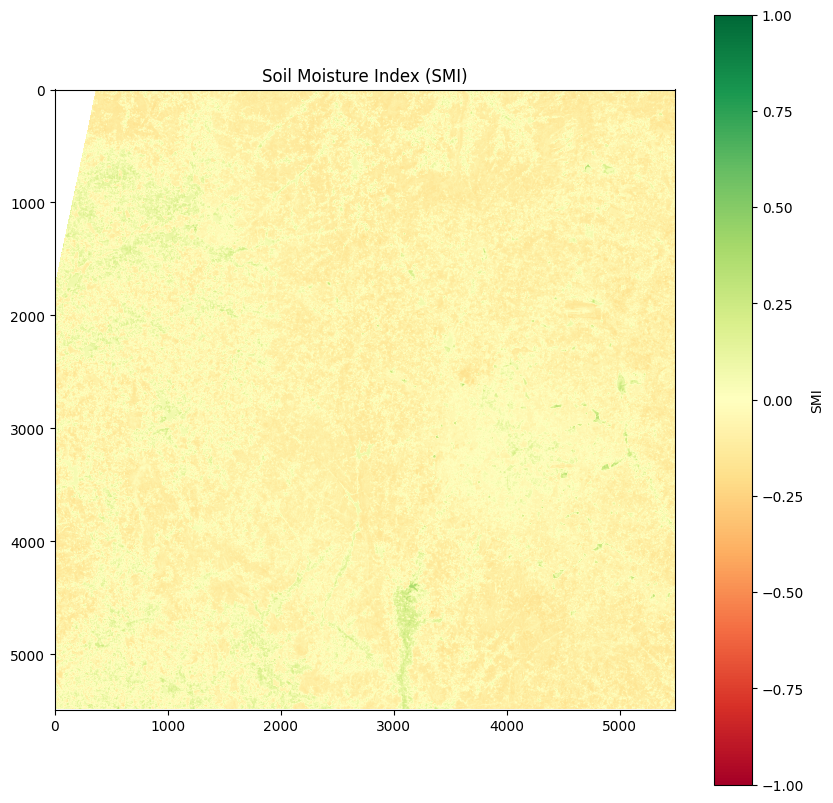

In [22]:
#soil moisture index
with rio.open('/images/T43PGQ_20240318T050651_B8A_20m.jp2') as src8a:
    nir8A_band = src8a.read(1).astype(float)
with rio.open('/images/T43PGQ_20240318T050651_B11_20m.jp2') as src11:
    swir_band = src11.read(1).astype(float)
smi = (nir8A_band - swir_band) / (nir8A_band + swir_band)
plt.figure(figsize=(10, 10))
plt.imshow(smi, cmap='RdYlGn')
#plt.colorbar(label='SMI')
plt.title('Soil Moisture Index (SMI)')
plt.show()


In [24]:
# Calculate the percentage of soil moisture for each range
dry_pixels = np.count_nonzero(smi < -0.1)
moist_pixels = np.count_nonzero((smi >= -0.1) & (smi < 0.1))
wet_pixels = np.count_nonzero(smi >= 0.1)
total_pixels = dry_pixels + moist_pixels + wet_pixels

dry_percentage = (dry_pixels / total_pixels) * 100
moist_percentage = (moist_pixels / total_pixels) * 100
wet_percentage = (wet_pixels / total_pixels) * 100

# Print the results
print("Dry percentage:", dry_percentage)
print("Moist percentage:", moist_percentage)
print("Wet percentage:", wet_percentage)


Dry percentage: 34.642316308377325
Moist percentage: 58.005951337925275
Wet percentage: 7.351732353697393
